In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator 
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_city
from qiskit_ibm_runtime import Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import CXGate
from qiskit.quantum_info import Operator

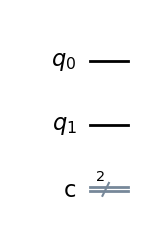

In [2]:
qc = QuantumCircuit(2,2)
qc.draw("mpl")

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


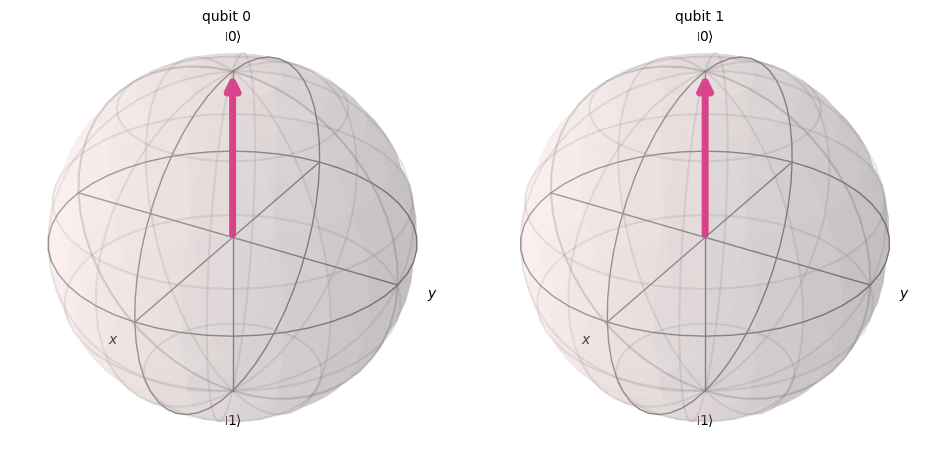

In [3]:
out_vector = Statevector(qc)
print(out_vector)
plot_bloch_multivector(out_vector)

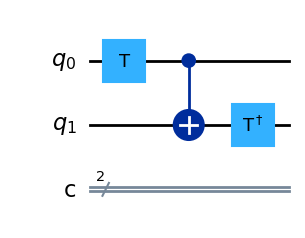

In [4]:
# theta = np.pi
# phi = 0
# lam = np.pi
# qc.h(0)
# qc.t(0)

qc.t(0)
qc.cx(0,1)
qc.tdg(1)
# qc.u(theta,phi,lam,0)
qc.draw(output="mpl")

In [8]:
cnot_matrix = Operator(CXGate()).data
print(cnot_matrix)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


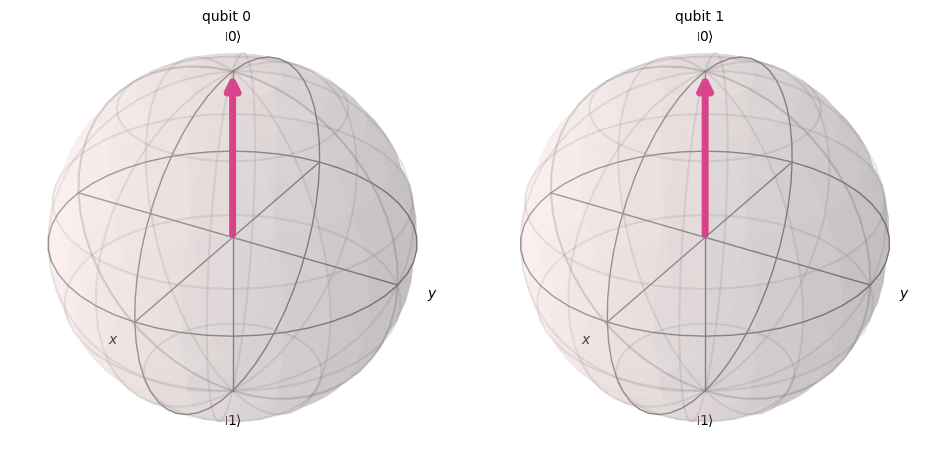

In [6]:
out_vector = Statevector(qc)
print(out_vector)
plot_bloch_multivector(out_vector)
# plot_state_city(out_vector)

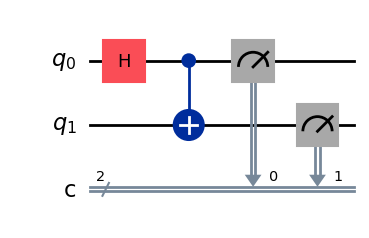

In [8]:
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output="mpl")


Measurement results: {'00': 43, '11': 57}


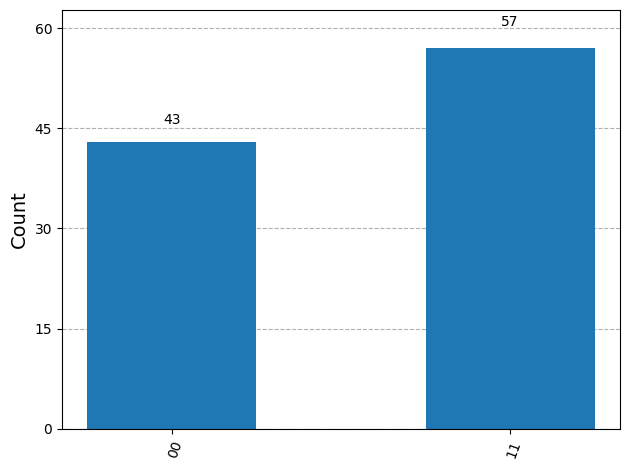

In [9]:

simulator = AerSimulator()
job = simulator.run(qc, shots=100)
result = job.result()
counts = result.get_counts(qc)

print("Measurement results:", counts)
plot_histogram(counts)